In [29]:
from lib.lif import activation,integrate,gradient
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['std', 'gradient']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# y=[15*i for i in range(784)]
y=-1000*np.ones([10,1])
#y=[ 0.08559519,  0.09360664,  0.08032885,  0.06597956,  0.08390406,0.03591417,  0.07471292,  0.13931046,  0.11574876,  0.06891738]
vec_integral=np.vectorize(integrate)
std=np.random.uniform(0.1,0.9,6)
gl=np.random.uniform(0.1,0.9,6)
theta=np.random.uniform(0.1,0.9,6)
store_tmp=[]
for std_i in range(std.shape[0]):
    for gl_i in range(gl.shape[0]):
        for theta_i in range(theta.shape[0]):
            store_tmp.append(vec_integral(y,std[std_i],gl[gl_i],theta[theta_i])[0])

lib/lif.py:51: RuntimeWarning: overflow encountered in exp
  first = np.exp(-u**2+ 2*y_th*u)
/opt/anaconda/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:2652: RuntimeWarning: invalid value encountered in integrate (vectorized)
  outputs = ufunc(*inputs)


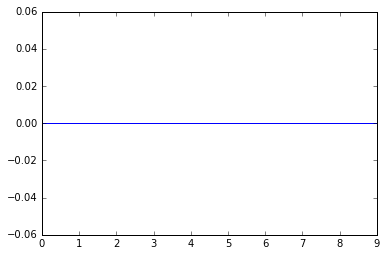

In [3]:
int_const=np.divide(1,store_tmp[0])
plt.plot(int_const)
plt.show()

In [4]:
store_tmp

[array([[ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf]]), array([[ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf]]), array([[ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf]]), array([[ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf]]), array([[ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf]]), array([[ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf],
        [ inf]]), array([[ inf],
        [ inf],
  

In [5]:
np.random.uniform(0.1,0.9,6).shape

(6,)

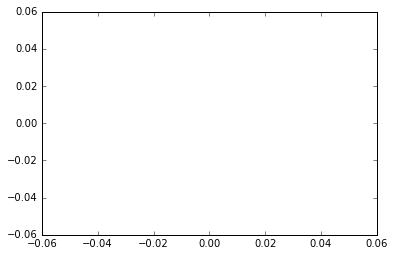

In [6]:
plt.plot(store_tmp[0])
# plt.yscale('log')
plt.show()

In [7]:
from lib.lif import mnist_spike

lamba=np.random.uniform(0.1,0.9,6)
tau_s = 0.020
t_filter = np.linspace(0, 1, 1000)
exp_filter = np.exp(-t_filter/tau_s)
exp_filter = exp_filter/np.sum(exp_filter)
ds = exp_filter[0]
inp = np.zeros([784,lamba.shape[0]])
out=np.zeros([lamba.shape[0],10])
for i in range(lamba.shape[0]):
    x,y = mnist_spike(lamba=lamba[i],D=1000,kernel=exp_filter)
    inp[:,i] = np.sum(x,1)
    out[i,:] = y

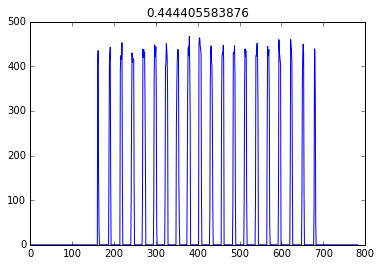

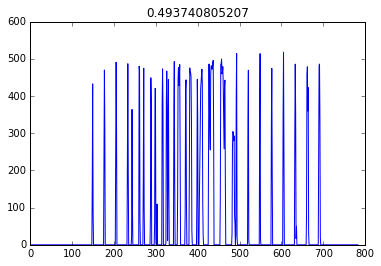

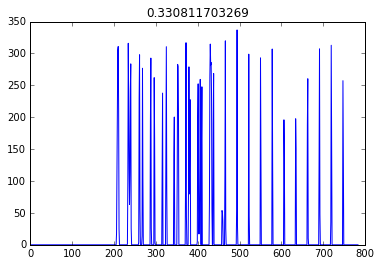

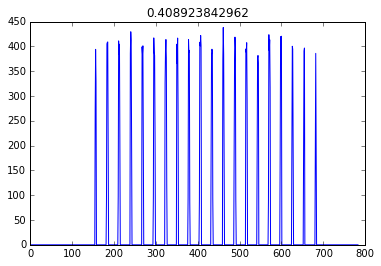

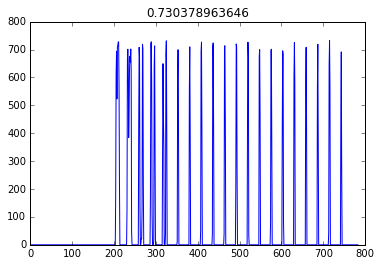

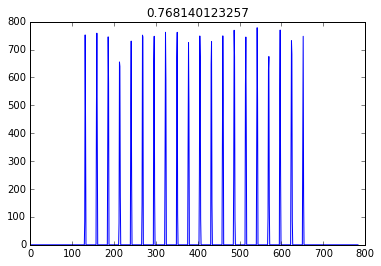

In [8]:
for plt_count in range(inp.shape[1]):
    plt.plot(inp[:,plt_count])
    plt.title(lamba[plt_count])
    plt.show()


In [9]:
from lib.lif import LIF_Recurrent, ParamsLIF_Recurrent
from lib.causal import causaleffect_maxv, causaleffect_maxv_linear, causaleffect_maxv_sp

#Test LIF_Recurrent network
nsims = 1

cvals = [0.0, 0.7]
pvals = np.logspace(-2, 0, 10)
#c = 0.9
n1 = 200
n2 = 10
tau_s = 0.020
dt = 0.001
t = 1   #In seconds
sigma = 10
x = 0
#p = 0.1
DeltaT = 10

nC = len(cvals)
nP = len(pvals)

t_filter = np.linspace(0, 1, 1000)
exp_filter = np.exp(-t_filter/tau_s)
exp_filter = exp_filter/np.sum(exp_filter)
ds = exp_filter[0]

params = ParamsLIF_Recurrent(exp_filter, sigma = sigma,sigma1=0.1, n1 = n1, n2 = n2)
lif = LIF_Recurrent(params, t = t)
inp,v, h, u, sh, tograph ,x, y = lif.simulate()

('y_hat:', array([ 0.12436384,  0.11649278,  0.09589335,  0.06144097,  0.02139566,
        0.09818143,  0.16997395,  0.16664855,  0.10471753,  0.11464687]))


('y_hat:', array([ 0.0991351 ,  0.10044036,  0.0813385 ,  0.03447864,  0.01795691,
        0.0893904 ,  0.14423236,  0.13515586,  0.08185059,  0.09072583]))


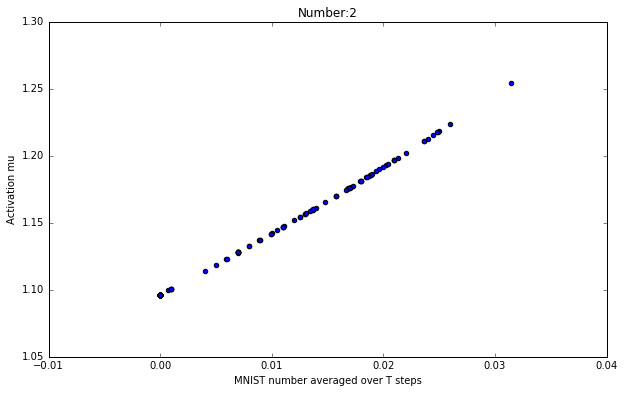

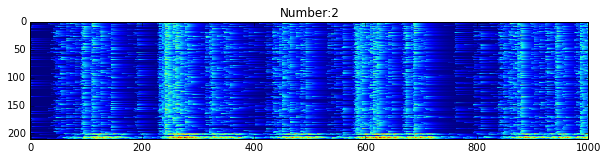

('y_hat:', array([ 0.10738437,  0.10938248,  0.08659144,  0.03896512,  0.02248605,
        0.09370118,  0.15417704,  0.13506986,  0.08771259,  0.1053676 ]))


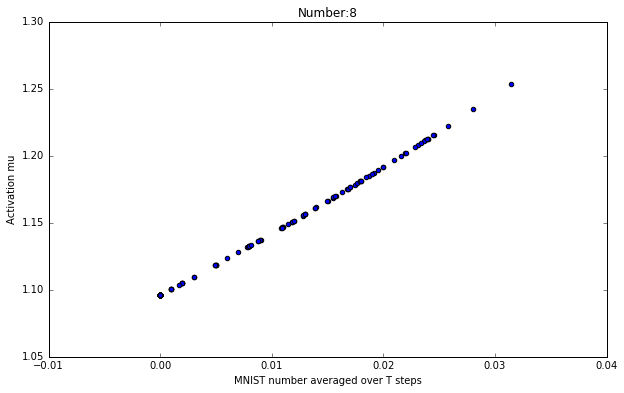

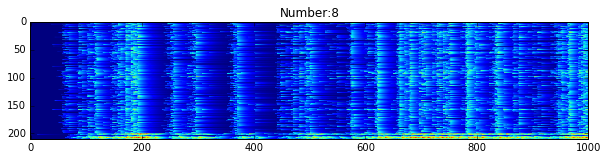

('y_hat:', array([ 0.08333888,  0.08334141,  0.08351674,  0.04374227,  0.02453027,
        0.08710353,  0.12965198,  0.12029751,  0.08147553,  0.08308369]))


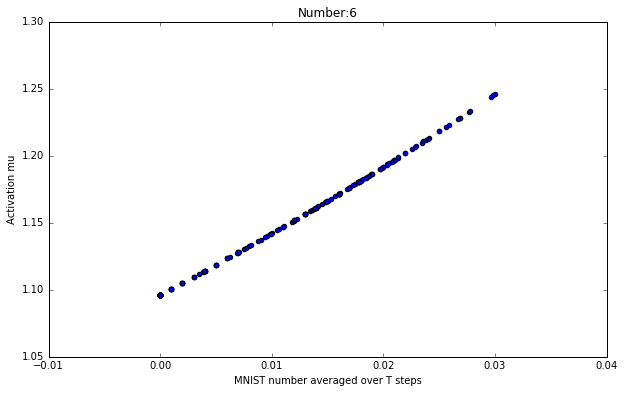

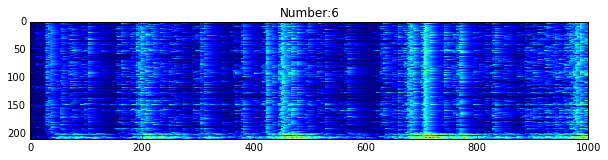

('y_hat:', array([ 0.12485074,  0.12089602,  0.09880334,  0.06769361,  0.02346702,
        0.09175023,  0.16873922,  0.15711792,  0.10189836,  0.10616069]))


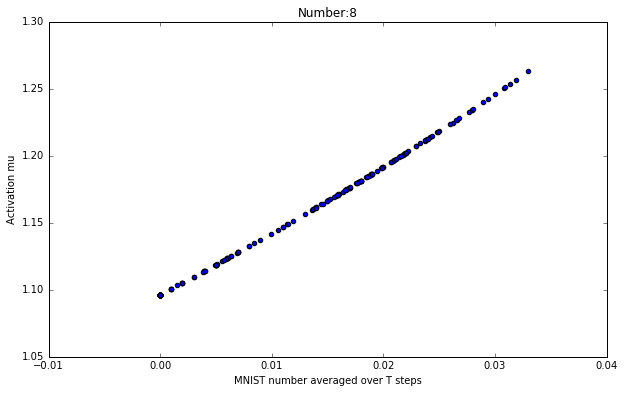

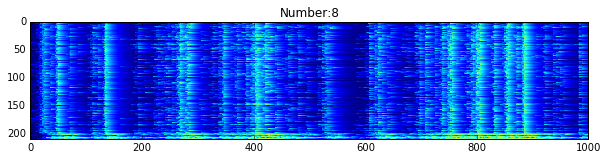

('y_hat:', array([ 0.11710479,  0.11099368,  0.09961525,  0.05101409,  0.02581663,
        0.09908318,  0.16891056,  0.16094683,  0.10892895,  0.11083191]))


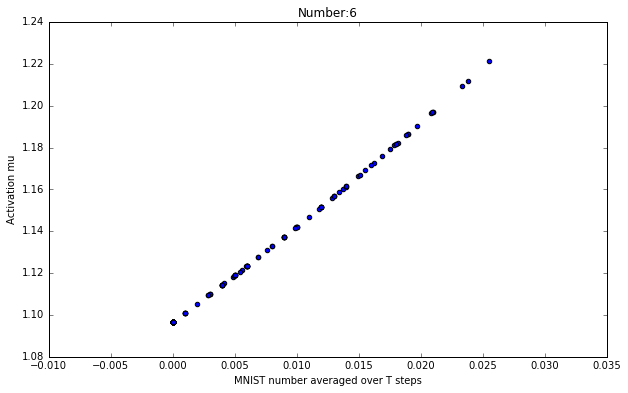

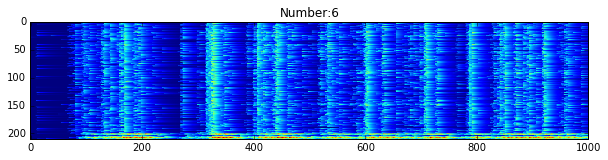

In [33]:
for i in range(5):
    inp,v, h, u, sh, tograph ,x, y = lif.simulate()
    y_not_hot = np.where(y==1)[0]+1
    plt.scatter(np.mean(x,1),tograph[0,:])
    plt.xlabel("MNIST number averaged over T steps")
    plt.ylabel("Activation mu")
    plt.title("Number:%d"%y_not_hot[0])
    plt.show()
    plt.imshow(sh)
    plt.title("Number:%d"%y_not_hot[0])
    plt.show()

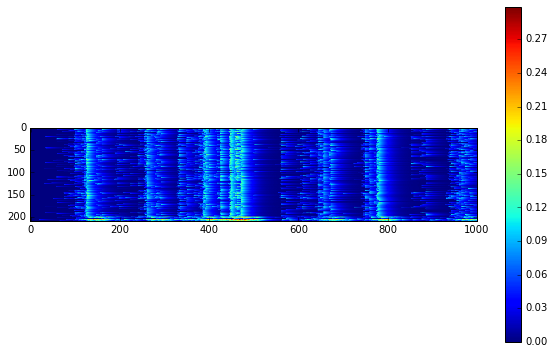

In [31]:
plt.imshow(sh)
plt.colorbar()
plt.show()


In [26]:
np.mean(sh,1)

array([ 0.02763469,  0.0279894 ,  0.0225939 ,  0.01886244,  0.03543372,
        0.04725693,  0.01757593,  0.03267044,  0.02656465,  0.04247352,
        0.03467753,  0.02545491,  0.02649349,  0.03064791,  0.02278546,
        0.01854226,  0.03068454,  0.03144149,  0.02748241,  0.01776573,
        0.04424172,  0.04159151,  0.0318694 ,  0.02382756,  0.02775337,
        0.04307175,  0.03077261,  0.03267841,  0.04220409,  0.0295212 ,
        0.02576975,  0.03456656,  0.03270925,  0.05485268,  0.01566564,
        0.03118588,  0.02666895,  0.03585926,  0.02284245,  0.04249945,
        0.02851461,  0.0363811 ,  0.01990946,  0.02658839,  0.02683505,
        0.02356262,  0.04067218,  0.03422773,  0.03386726,  0.03273792,
        0.03968926,  0.03828221,  0.02433727,  0.04237921,  0.03951813,
        0.02805601,  0.0393844 ,  0.03167931,  0.03271398,  0.02467816,
        0.02571755,  0.03546762,  0.02323983,  0.03813075,  0.02552179,
        0.03421809,  0.03241205,  0.02378727,  0.02296132,  0.02